# Notes for using colors in python

#### Import relevant libraries

In [1]:
import matplotlib 
import matplotlib.colors
from matplotlib import cm
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import numpy as np
import colorsys

#### Define method for displaying a color

In [2]:
def show_color(color):
    """
    Display an RGB color in jupyter notebook
    Input: an RGB color (R,G,B) in [0,255]
    """
    color = color[0]/255,color[1]/255,color[2]/255
    fig,ax = plt.subplots(figsize=(0.5,0.2))
    _ = ax.add_patch(Rectangle((0, 0), 0.4,0.2,color=color))
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    _ = ax.set_xlim([0,0.4])
    _ = ax.set_ylim([0,0.2])

# Convert hexadecimal color to decimal color
def hex2dec(h):
    """
    Input: A string for hexadecimal representation of a color, like #fcba03, not case sensitive
    Output: A tuple for decimal representation of (R,G,B) color  
    """
    assert h.startswith("#"),"Hexadecimal should starts with #"
    assert len(h) == 7,"Hexadecimal color has wrong length"
    h = h[1:]
    r,g,b = int(h[0:2],16),int(h[2:4],16),int(h[4:6],16)
    return r,g,b

In [3]:
hex2dec("#fCBA03")

(252, 186, 3)

In [4]:
show_color(color=(252, 186, 3))

## 一些基础
### Representation of a color
#### RGB color
- define by values of R,G,B channel
- 十六进制(Hexadecimal) representation
  - Like `#FCBA03`
  - From  black `#000000` to  white `#FFFFFF`
- 十进制(Decimal) representation
  - From black (0,0,0) to white (255,255,255)
  - Colors in matplotlib is usually decimal color divided by 255, or black (0,0,0) to white (1,1,1)
  
#### HSV(B,L) color
  - **H**ue: 色相
  - **S**aturation: 饱和度
  - **V**alue , **B**rightness or **L**ightness:亮度
  - 比RGB编码对人类感知更友好，各种软件调色盘的颜色一般都按(H,S,V)分布
  - 一般高亮度，高饱和度的颜色会显得比较刺眼，所以最好避免使用

#### Conversion between `rgb` and `hsv`
  - You can use native package [colorsys](https://docs.python.org/3/library/colorsys.html) in python3
  - See following example

In [5]:
colorsys.rgb_to_hsv(0.2, 0.4, 0.4)

(0.5, 0.5, 0.4)

In [6]:
colorsys.hsv_to_rgb(0.5, 0.5, 0.4)

(0.2, 0.4, 0.4)

#### 改变一个RGB颜色的亮度和饱和度
- 将RGB转为HSV
- 固定H不变，调整S或V
- 转回RGB
- 找一个带调色盘的软件手动选取当然也是可以的

In [7]:
def changeSL(color,S=1,V=1):
    """
    Input: an RGB color (R,G,B) in [0,255]
    S: multiplier for saturation
    V: multiplier for brightness
    """
    
    color_rgb = (color[0]/255, color[1]/255, color[2]/255)
    color_hsv = colorsys.rgb_to_hsv(*color_rgb)
    color_hsv = color_hsv[0],min(color_hsv[1]*S,1),min(color_hsv[2]*V,1)
    color_rgb = colorsys.hsv_to_rgb(*color_hsv)
    return color_rgb[0]*255,color_rgb[1]*255,color_rgb[2]*255

In [8]:
print("降低亮度")
show_color(color=(252, 186, 3))
color_rgb_darken = changeSL((252, 186, 3),V=5/7)
show_color(color=color_rgb_darken)

降低亮度


In [9]:
print("降低饱和度")
show_color(color=(252, 186, 3))
color_rgb_darken = changeSL((252, 186, 3),S=1/2)
show_color(color=color_rgb_darken)

降低饱和度


### python中的作图工具
- python中最常见的作图工具有[matplotlib](https://matplotlib.org/)和[seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)两个
- seaborn其实是对matplotlib的一个封装，他的所有作图函数我们都可以基于matplotlib手动实现,但在很多时候可以节约时间
- matplotlib 的内置色盘<https://matplotlib.org/stable/tutorials/colors/colormaps.html>
- seaborn的内置色盘<https://seaborn.pydata.org/tutorial/color_palettes.html>

### 常见的color palette类型以及在python中的实现

### qualitative color
  - 离散的无序颜色
  - 一般用来表示数据的不同类别
  - 如果希望突出类别间的差异性，优先使用互补的色相
  - 如果希望突出类别间的相似性，优先使用相似的色相
  - 好不好看严重依赖个人审美的主观偏好性
  - matplotlib的默认qualitative color map叫做`tab10`
  - seaborn的默认qualitative color map实际上是亮度和对比度调低的`tab10`

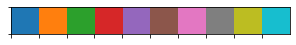

In [10]:
# matplotlib默认的配色
sns.palplot(sns.color_palette("tab10"),size=0.5)

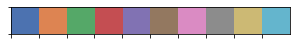

In [11]:
# seaborn默认的配色,实际上就是tab10降低了一些饱和度
# sns.color_palette return list of rgb colors
sns.palplot(sns.color_palette("deep"),size=0.5)

- R 包[ggsci](https://cran.r-project.org/web/packages/ggsci/vignettes/ggsci.html)提供了一些配色方案,部分pick如下，供参考

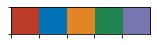

In [12]:
## NEJM palette
## 其实就是"tab10"取了前五个，调一调深浅饱和度
sns.palplot(["#BC3C29","#0072B5","#E18627","#20854E","#7776B1"],size=0.5)

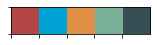

In [13]:
## JAMA palette
sns.palplot(["#B24745","#00A1D5","#E08F44","#79AF97","#374E54"],size=0.5)

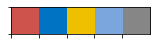

In [14]:
## JCO plaette
sns.palplot(["#CE534C","#0073C2","#EFC000","#7AA6DD","#868686"],size=0.5)

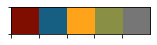

In [15]:
## https://news.uchicago.edu/sites/default/files/attachments/_uchicago.identity.guidelines.pdf
sns.palplot(["#7F0D00","#165F83","#FFA31A","#898F45","#767676"],size=0.5)

- Palette of a Genome Biology paper

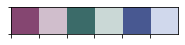

In [16]:
## https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02258-y
sns.palplot(["#854671","#D0BECC","#3B6B69","#CAD8D6","#485891","#D0D8EC"],size=0.5)

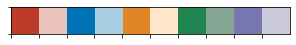

In [17]:
## We shall produce a similar palette from NEJM palette
## 增加亮度，降低饱和度
NEJM = ["#BC3C29","#0072B5","#E18627","#20854E","#7776B1"]
colors = []
for c in NEJM:
    rgb = hex2dec(c)
    colors.append(tuple(np.array(rgb)/255))
    rgb_desaturated = changeSL(rgb,V=5/4,S=1/4)
    colors.append(tuple(np.array(rgb_desaturated)/255))
sns.palplot(colors,size=0.5)

### Sequential color
- 有序的颜色，可以用来表示一个量的多少
- 本质上是在色彩空间上的两个点之间插值，即两种颜色之间按特定方法画一条线，在线上按一定的规则取一些点
- 可以表示连续数值和离散数值
- matplotlib中的`Blues`,`Red`,`Grey`等
- 应用场景
  - 用heatmap可视化相关系数，基因表达量等
  - 根据某个数值在barplot, scatter plot等上面标颜色 (如根据某个marker gene的表达量为单细胞测序数据的tSNE plot上色)

- `cm.Blues` is a `matplotlib.colors.LinearSegmentedColormap`, that map a continous numericial value to a color
- Individual color can be accessed by function call

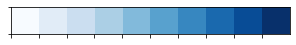

In [18]:
sns.palplot(cm.Blues(np.linspace(0,1,10)),size=0.5)

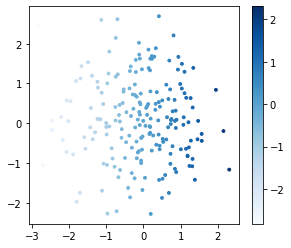

In [19]:
x = np.random.randn(200)
y = np.random.randn(200)
fig,ax = plt.subplots(figsize=(4.7,4))
im = ax.scatter(x,y,c=x,cmap=cm.Blues,s=8)
fig.colorbar(im, ax=ax)

### Diverging color
- 有序的颜色，表示向两个方向的变化
- 如用热图可视化差异基因的z-score
- 理想的diverging color应当"perceptually uniform"
- 最常见的蓝-白-红的热图，中间的白色部分会比较醒目，这是不期望的
- <https://arxiv.org/abs/1509.03700>
- 推荐`cm.coolwarm`，`cm.RdBu_r`可能更常用
- cm.coolwarm is a `matplotlib.colors.LinearSegmentedColormap`

In [20]:
# Do not use this
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["blue","white","red"])
sns.palplot(cmap(np.linspace(0.1,0.9,100)),size=0.2)

In [21]:
# better
sns.palplot(sns.color_palette("RdBu_r",n_colors=100),size=0.2)

In [22]:
# better
sns.palplot(sns.color_palette("coolwarm",n_colors=100),size=0.2)

In [23]:
# Same as last chunk
sns.palplot(cm.coolwarm(np.linspace(0,1,100)),size=0.2)